# Import Library

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [45]:
start_date = datetime(2005, 1, 1)
end_date = datetime(2021, 1, 1)

df = yf.download(
  'SPY', 
  start = start_date,
  end = end_date
)

[*********************100%%**********************]  1 of 1 completed


In [46]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.364349,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.345726,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,81.777451,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,82.193237,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.075439,55847700
...,...,...,...,...,...,...
2020-12-24,368.079987,369.029999,367.450012,369.000000,351.874725,26457900
2020-12-28,371.739990,372.589996,371.070007,372.170013,354.897644,39000400
2020-12-29,373.809998,374.000000,370.829987,371.459991,354.220551,53680500


Text(0.5, 0, 'Date')

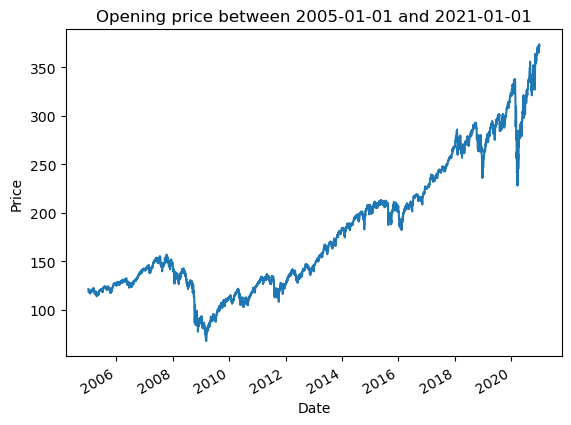

In [47]:
plt.title('Opening price between {} and {}'.format(start_date.date().isoformat(), end_date.date().isoformat()))
df['Open'].plot()
plt.ylabel('Price')
plt.xlabel('Date')

In [48]:
# resample the data to weekly data and make each year consistent
df1 = df.reset_index().resample('W', on = 'Date')['Open'].mean()
df1 = df1[df]

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [ ]:
# df1 = df1[df1.index.week < 53]
df1

C:\Users\julia\AppData\Local\Temp\ipykernel_22408\648574031.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df1 = df1[df1.index.week < 53]


Date
2005-01-09    119.634000
2005-01-16    118.398000
2005-01-23    118.290001
2005-01-30    117.200000
2005-02-06    118.663998
                 ...    
2020-11-29    361.114998
2020-12-06    365.444000
2020-12-13    367.577997
2020-12-20    369.754004
2020-12-27    367.384995
Name: Open, Length: 832, dtype: float64

In [ ]:
cond = df1.index.isocalendar().week
cond

Date
2005-01-09     1
2005-01-16     2
2005-01-23     3
2005-01-30     4
2005-02-06     5
              ..
2020-11-29    48
2020-12-06    49
2020-12-13    50
2020-12-20    51
2020-12-27    52
Name: week, Length: 832, dtype: UInt32